In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [184]:
graf_raw = pd.read_csv("data/311_Service_Requests_-_Graffiti_Removal.csv")
build_raw = pd.read_csv("data/311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported.csv")
light_raw = pd.read_csv("data/311_Service_Requests_-_Alley_Lights_Out.csv")
commarea_raw = pd.read_csv("data/CommAreas.csv")

In [185]:
# get rid of duplicates
graf_new = graf_raw[graf_raw['Status'].isin(['Completed', 'Open'])]
light_new = light_raw[light_raw['Status'].isin(['Completed', 'Open'])]

In [186]:
graf = graf_new[['Service Request Number', 'Type of Service Request', 'Creation Date', 'Completion Date', \
                 'What Type of Surface is the Graffiti on?',\
                'Community Area', 'Latitude','Longitude', 'Location']]

In [187]:
build = build_raw[['SERVICE REQUEST NUMBER','SERVICE REQUEST TYPE', 'DATE SERVICE REQUEST WAS RECEIVED', 'DATE SERVICE REQUEST WAS RECEIVED',\
                  'IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?',\
                  'Community Area', 'LATITUDE', 'LONGITUDE', 'Location']]

In [188]:
light = light_new[['Service Request Number','Type of Service Request','Creation Date', 'Completion Date',\
                  'Status', \
                  'Community Area', 'Latitude', 'Longitude', 'Location']]

In [189]:
build.columns = graf.columns
light.columns = graf.columns
combinedf = pd.concat([graf, build, light], ignore_index=True)
combinedf.rename(columns={'What Type of Surface is the Graffiti on?':'Subtype'}, inplace=True)

In [190]:
commarea = commarea_raw[['AREA_NUMBE', 'COMMUNITY']].rename(columns={'AREA_NUMBE':'Community Area', \
                                                                     'COMMUNITY':'Neighborhood'})
combinedf_area = pd.merge(combinedf, commarea, how='right', on='Community Area')

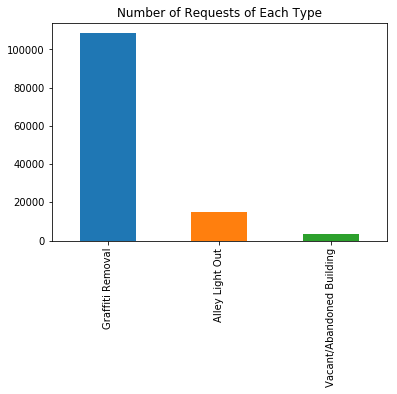

In [191]:
# summary stats for number of requests of each type
req_type = combinedf["Type of Service Request"].value_counts()
req_type.plot(kind="bar", title="Number of Requests of Each Type")

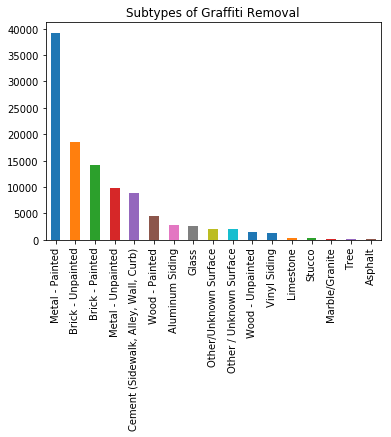

In [192]:
# summary stats for graffiti subtypes
graf_subtype = combinedf[combinedf["Type of Service Request"]=='Graffiti Removal']['Subtype'].value_counts()
graf_subtype.plot(kind="bar", title="Subtypes of Graffiti Removal")

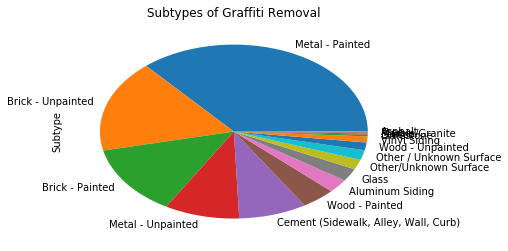

In [193]:
graf_subtype.plot(kind="pie", title="Subtypes of Graffiti Removal")

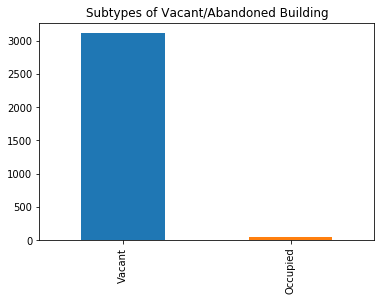

In [194]:
# summary stats for vacant building subtypes
build_subtype = combinedf[combinedf["Type of Service Request"]=='Vacant/Abandoned Building']['Subtype'].value_counts()
build_subtype.plot(kind="bar", title="Subtypes of Vacant/Abandoned Building")

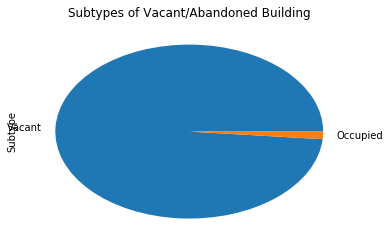

In [195]:
build_subtype.plot(kind="pie", title="Subtypes of Vacant/Abandoned Building")

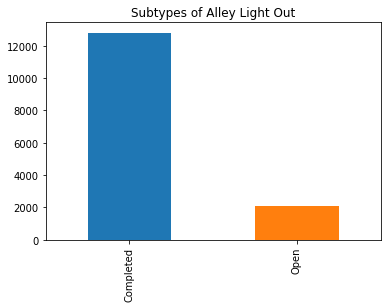

In [196]:
# summary stats for lights out subtypes
light_subtype = combinedf[combinedf["Type of Service Request"]=='Alley Light Out']['Subtype'].value_counts()
light_subtype.plot(kind="bar", title="Subtypes of Alley Light Out")

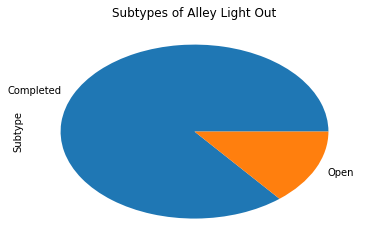

In [197]:
light_subtype.plot(kind="pie", title="Subtypes of Alley Light Out")

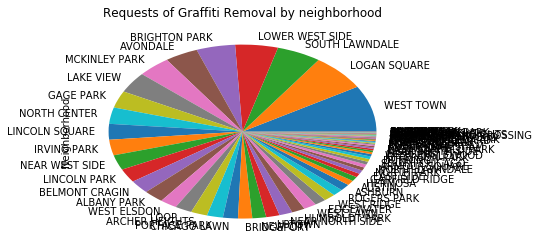

In [198]:
# summary stats for graffiti by neighborhood
graf_neighbor = combinedf_area[combinedf_area["Type of Service Request"]=='Graffiti Removal']['Neighborhood'].value_counts()
graf_neighbor.plot(kind="pie", title="Requests of Graffiti Removal by neighborhood")

In [199]:
graf_neighbor[:10]

WEST TOWN          9325
LOGAN SQUARE       7343
SOUTH LAWNDALE     5789
LOWER WEST SIDE    5584
BRIGHTON PARK      5074
AVONDALE           4336
MCKINLEY PARK      4278
LAKE VIEW          4193
GAGE PARK          3402
NORTH CENTER       3297
Name: Neighborhood, dtype: int64

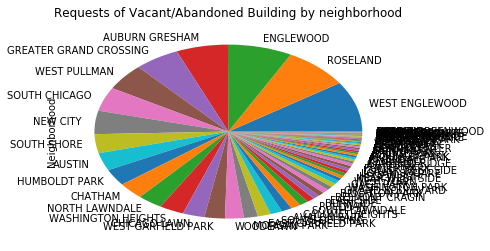

In [200]:
# summary stats for vacant building by neighborhood
build_neighbor = combinedf_area[combinedf_area["Type of Service Request"]=='Vacant/Abandoned Building']['Neighborhood'].value_counts()
build_neighbor.plot(kind="pie", title="Requests of Vacant/Abandoned Building by neighborhood")

In [201]:
build_neighbor[:10]

WEST ENGLEWOOD            345
ROSELAND                  288
ENGLEWOOD                 284
AUBURN GRESHAM            229
GREATER GRAND CROSSING    198
WEST PULLMAN              182
SOUTH CHICAGO             163
NEW CITY                  159
SOUTH SHORE               129
AUSTIN                    121
Name: Neighborhood, dtype: int64

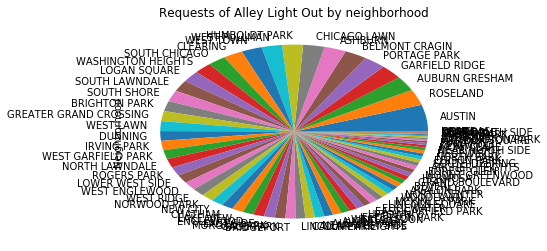

In [202]:
# summary stats for lights out by neighborhood
light_neighbor = combinedf_area[combinedf_area["Type of Service Request"]=='Alley Light Out']['Neighborhood'].value_counts()
light_neighbor.plot(kind="pie", title="Requests of Alley Light Out by neighborhood")

In [203]:
light_neighbor[:10]

AUSTIN            742
ROSELAND          441
AUBURN GRESHAM    411
GARFIELD RIDGE    401
PORTAGE PARK      398
BELMONT CRAGIN    396
ASHBURN           392
CHICAGO LAWN      386
HUMBOLDT PARK     375
WEST PULLMAN      370
Name: Neighborhood, dtype: int64

In [216]:
# Response time by the city
combinedf['Creation Date'] = pd.to_datetime(combinedf['Creation Date'])
combinedf['Completion Date'] = pd.to_datetime(combinedf['Completion Date'])
combinedf['Response Time'] = combinedf['Completion Date'] - combinedf['Creation Date']

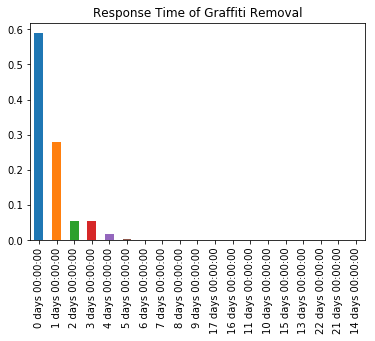

In [222]:
# summary stats for graffiti removal response time
graf_response = combinedf[combinedf["Type of Service Request"]=='Graffiti Removal']['Response Time'].value_counts()
graf_response_pct = graf_response/graf_response.sum()
graf_response_pct.plot(kind="bar", title="Response Time of Graffiti Removal")

In [206]:
graf_response_pct

0 days     0.588915
1 days     0.280242
2 days     0.054066
3 days     0.053596
4 days     0.017265
5 days     0.003950
6 days     0.000969
7 days     0.000591
8 days     0.000138
9 days     0.000065
17 days    0.000037
16 days    0.000037
11 days    0.000028
10 days    0.000028
15 days    0.000018
13 days    0.000018
22 days    0.000018
21 days    0.000009
14 days    0.000009
Name: Response Time, dtype: float64

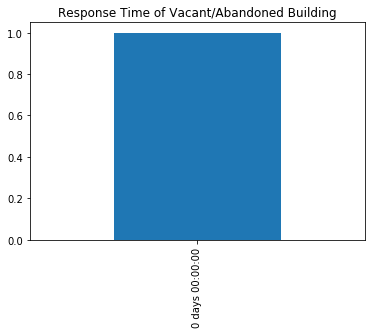

In [207]:
# summary stats for Vacant/Abandoned Building response time
build_response = combinedf[combinedf["Type of Service Request"]=='Vacant/Abandoned Building']['Response Time'].value_counts()
build_response_pct = build_response/build_response.sum()
build_response_pct.plot(kind="bar", title="Response Time of Vacant/Abandoned Building")

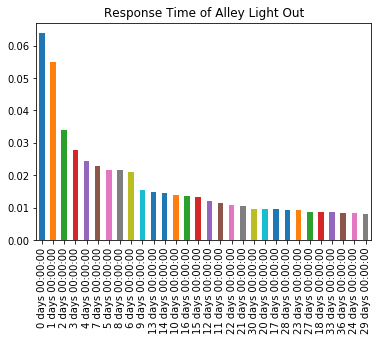

In [208]:
# summary stats for Alley Light Out response time
light_response = combinedf[combinedf["Type of Service Request"]=='Alley Light Out']['Response Time'].value_counts()
light_response_pct = light_response/light_response.sum()
light_response_pct[:30].plot(kind="bar", title="Response Time of Alley Light Out")

In [209]:
# summary stats for types per response time
type_per_response = combinedf.groupby(['Response Time', 'Type of Service Request']).size()

In [210]:
pct_per_response = type_per_response/combinedf.groupby('Response Time').size() *100
pct_per_response[:50]

Response Time  Type of Service Request  
0 days         Alley Light Out                1.199051
               Graffiti Removal              93.433767
               Vacant/Abandoned Building      5.367182
1 days         Alley Light Out                2.268778
               Graffiti Removal              97.731222
2 days         Alley Light Out                6.911344
               Graffiti Removal              93.088656
3 days         Alley Light Out                5.760182
               Graffiti Removal              94.239818
4 days         Alley Light Out               14.409881
               Graffiti Removal              85.590119
5 days         Alley Light Out               39.290780
               Graffiti Removal              60.709220
6 days         Alley Light Out               72.074468
               Graffiti Removal              27.925532
7 days         Alley Light Out               82.022472
               Graffiti Removal              17.977528
8 days         Alley Lig

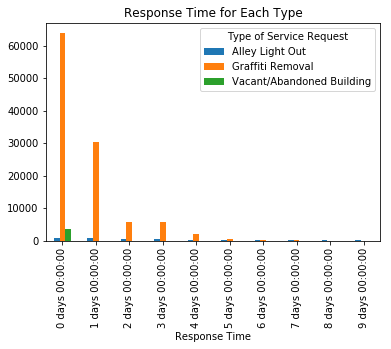

In [232]:
response_table = combinedf.pivot_table(values='Service Request Number',\
                              index=['Response Time'], \
                              columns=['Type of Service Request'],
                              aggfunc='count')
response_table[:10].plot(kind='bar', title="Response Time for Each Type")

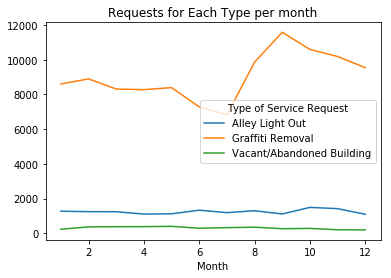

In [220]:
# summary stats for requests of each type by month
combinedf['Month'] = pd.DatetimeIndex(combinedf['Creation Date']).month
req_per_month = combinedf.pivot_table(values='Service Request Number',\
                              index=['Month'], \
                              columns=['Type of Service Request'],
                              aggfunc='count')
req_per_month.plot(kind='line', title="Requests for Each Type per month")

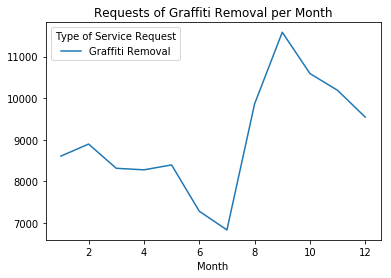

In [217]:
# summary stats for Requests of Graffiti Removal per Month
graf_month = combinedf[combinedf["Type of Service Request"]=='Graffiti Removal']
graf_month = graf_month.pivot_table(values='Service Request Number',\
                              index=['Month'], \
                              columns=['Type of Service Request'],
                              aggfunc='count')
graf_month.plot(kind="line", title="Requests of Graffiti Removal per Month")

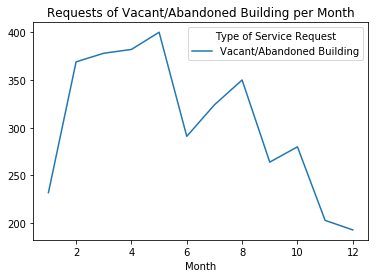

In [218]:
# summary stats for Requests of Vacant/Abandoned Building per Month
build_month = combinedf[combinedf["Type of Service Request"]=='Vacant/Abandoned Building']
build_month = build_month.pivot_table(values='Service Request Number',\
                              index=['Month'], \
                              columns=['Type of Service Request'],
                              aggfunc='count')
build_month.plot(kind="line", title="Requests of Vacant/Abandoned Building per Month")

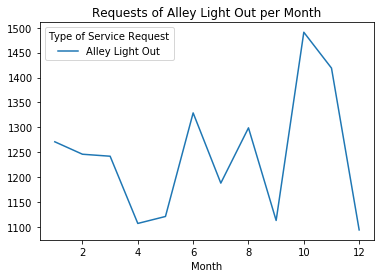

In [219]:
# summary stats for Requests of Alley Light Out per Month
light_month = combinedf[combinedf["Type of Service Request"]=='Alley Light Out']
light_month = light_month.pivot_table(values='Service Request Number',\
                              index=['Month'], \
                              columns=['Type of Service Request'],
                              aggfunc='count')
light_month.plot(kind="line", title="Requests of Alley Light Out per Month")